In [74]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data_root = "./data/"
os.listdir(data_root)

['test.csv', 'train.csv', 'gender_submission.csv']

# 综述
### 数据的基本检验：
### 数据的基本分析：
### 特征工程：
- 填补确实数、组合抽取新的数据

# 数据的基本检验

In [3]:
train_data = pd.read_csv(data_root + "train.csv")
test_data = pd.read_csv(data_root + "test.csv")

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age、Cabin、Embarked有空缺

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### 每一列的含义
- PassengerID：乘客的编号，应该没有什么意义，***可以删掉***
- PClass：船票级别，分1 2 3等级。1最好，这一点从describe中Pclass的均值为2.3看出。
- Name：乘客名称，但不是很正规。有着一些Mr、Miss等称号，***暂时不用，可以删掉***
- Sex：性别Male、Female
- Age：年龄，空缺非常多
- SlbSp：船上同辈人的数量：配偶、兄弟姐妹
- parch：船上上一辈子、和下一辈亲属的数量：父母、孩子
- Ticket：Ticket Number，看起来应该也没什么用 ***暂时没用，可以删掉***
- Fare：票价
- Cabin：船舱号码，有着大量的确实数值，而且是字符型变量，可以暂时不用。
- embarked：登船港口 C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
train_data["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [8]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 经过基本检验之后，留下了以下的特征：
#### 个人特征
- Sex:
- Age:
#### 登船信息
- PClass:船票级别
- Fare:船费
- Cabin:船舱号码
- Embarked:登船港口
#### 其他信息
- SipSp:船上的上、下辈亲属的数量：父母、孩子
- Parch:船上同辈人的数量：配偶、兄弟姐妹

# 数据的基本分析

## 测试关联关系

In [9]:
train_corr = train_data.corr()

#### 返回结果接近0说明无相关性,大于0说明是正相关,小于0是负相关.
- 可以看出PassengerId和其他特征的相关度确实很小，所以可以把这个***特征删除掉了。***

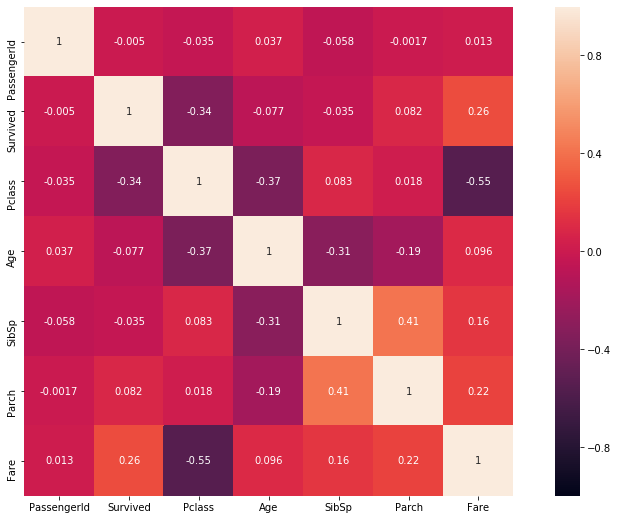

In [10]:
# 热力图
#画出相关性热力图
a = plt.subplots(figsize=(15,9))#调整画布大小
a = sns.heatmap(train_corr, vmin=-1, vmax=1 , annot=True , square=True)#画热力图

何如画这个热力图还需要看看

## 试图补充扩充数据
先不要着急，先从分析完旋转特性之后再说。
**特征之间可以相互辅助扩充。**

## 每个特征和结果的关联性分析
使用的一大语法是：
groupby
对于0-1分布，其均值就是概率

一般是分析两种：
一、分析其概率。对于每一类，分析有多少比率可以幸存。
二、分析其数量。对于每一类，分析有多少人可以幸存，有多少人遇难。

对于第二点，一点要两种都分析，否则在无法确定基数的情况下，这个统计不会那么可信。

这两点一般要一起测一测：
对于比率，假如数量不够的话，那么其置信度就会很低。例如很多100%或者0%的情况就是只有那么一两个样本。
对于数量，假如不看比率，数量只是一个相对数值。即便可以同时查看幸存和遇难的人数，但当样本技术都足够的特征值上，不方便直接看出生存率的变化。

## Pclass

In [11]:
train_data.groupby(['Pclass'])['Pclass','Survived'].mean()# 很好的关联性，可以用

Pclass  Survived
Pclass                  
1          1.0  0.629630
2          2.0  0.472826
3          3.0  0.242363

## Sex

In [12]:
train_data.groupby(["Sex"])['Sex','Survived'].mean()# 很强的相关性，可以用

Survived
Sex             
female  0.742038
male    0.188908

## Age

In [13]:
train_data.groupby(["Age"])['Age','Survived'].mean()# 像这种输入是接近连续的情况，画直方图或者折线图比较好

Age  Survived
Age                   
0.42    0.42       1.0
0.67    0.67       1.0
0.75    0.75       1.0
0.83    0.83       1.0
0.92    0.92       1.0
...      ...       ...
70.00  70.00       0.0
70.50  70.50       0.0
71.00  71.00       0.0
74.00  74.00       0.0
80.00  80.00       1.0

[88 rows x 2 columns]

In [14]:
train_data.groupby(["Age"])['Age','Survived'].mean()# 年龄是带着小数点的，这个看的是年龄和存活率的关系

Age  Survived
Age                   
0.42    0.42       1.0
0.67    0.67       1.0
0.75    0.75       1.0
0.83    0.83       1.0
0.92    0.92       1.0
...      ...       ...
70.00  70.00       0.0
70.50  70.50       0.0
71.00  71.00       0.0
74.00  74.00       0.0
80.00  80.00       1.0

[88 rows x 2 columns]

/opt/anaconda3/envs/stapy3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


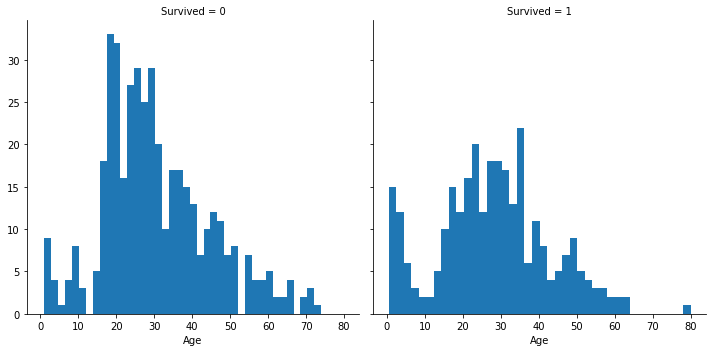

In [15]:
# 这个是年龄和生存人数的直方图，是一个“片面的”数值，因为我们并不知道是否这个年龄的人的基数更多。所以需要同时分析幸存和逝世的情况。
g = sns.FacetGrid(train_data, col='Survived',size=5)
g.map(plt.hist, 'Age', bins=40)
# 幸存和逝世的分布差不多相同，这一点不太好

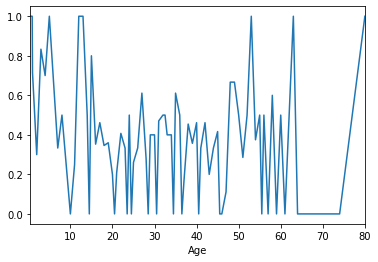

In [16]:
# 这个是年龄和生存率的折线图，这是一个绝对的数值。但是数据的特征有点略微的不好
train_data.groupby(['Age'])['Survived'].mean().plot()

## Fare

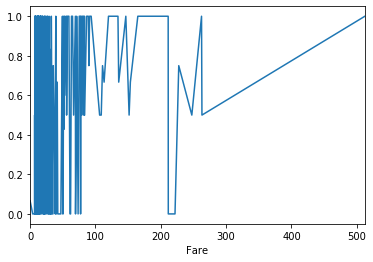

In [17]:
# 由于船票的数值相当的分散和不统一，直接使用这个特征观察其和Survived的关联性可能并不好
train_data.groupby(['Fare'])['Survived'].mean().plot()

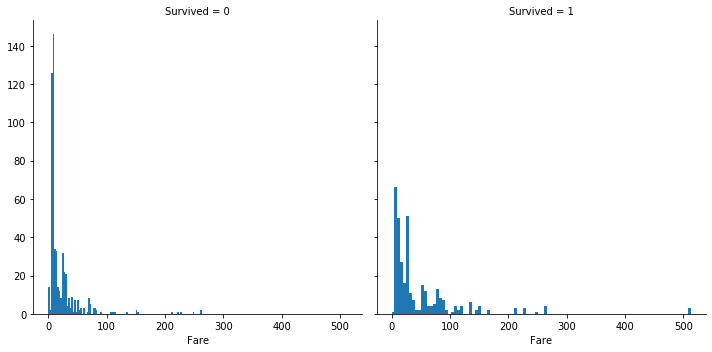

In [18]:
g = sns.FacetGrid(train_data, col='Survived',size=5)
g.map(plt.hist, 'Fare', bins=100)

In [19]:
# 显然船票是拿不到什么信息，因为大家的船票都集中在低或者中低售价区。

## Embarked

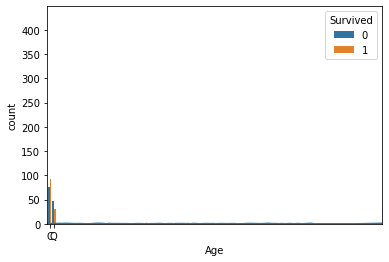

In [20]:
# 分析登陆港口
sns.countplot('Embarked',hue='Survived',data=train_data)
train_data.groupby(['Age'])['Survived'].mean().plot()

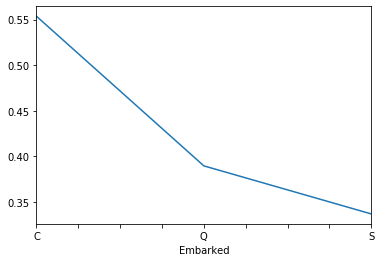

In [21]:
# 分析登陆港口
train_data.groupby(['Embarked'])['Survived'].mean().plot()
# 这生存率比较有关联性，可以保留

## Cabin

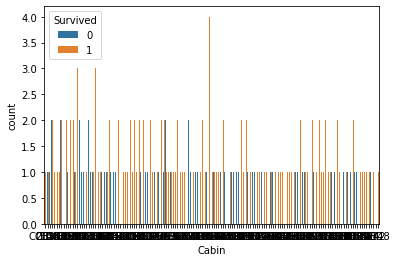

In [22]:
# 分析船舱
sns.countplot('Cabin',hue='Survived',data=train_data)
# 没什么明显的信息

## SibSp

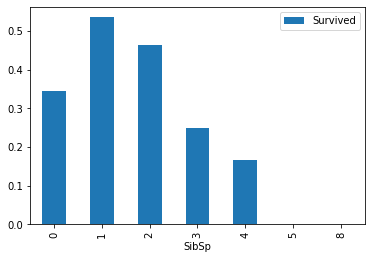

In [23]:
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar()
# 有相关性，但是不是很显著

In [24]:
train_data[['SibSp','Survived']].groupby(['SibSp']).mean()

Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000

/opt/anaconda3/envs/stapy3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


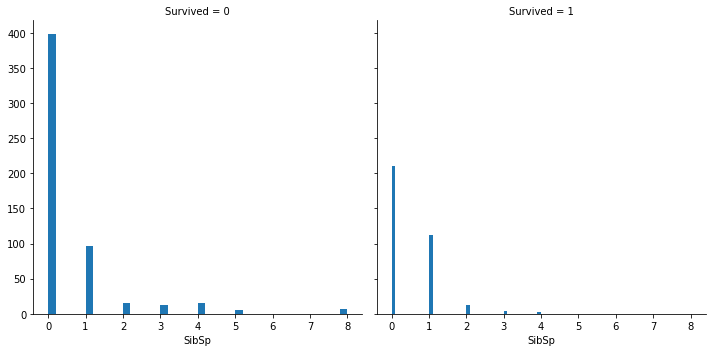

In [25]:
g = sns.FacetGrid(train_data, col='Survived',size=5)
g.map(plt.hist, 'SibSp', bins=40)
# 数据特性并不好，尤其是后面的样本数量太少
# 但是看起来可以是一个以1附近为最高点的凸函数

## Parch

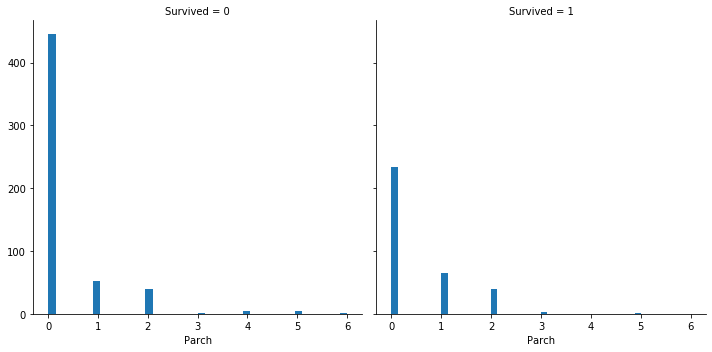

In [26]:
g = sns.FacetGrid(train_data, col='Survived',size=5)
g.map(plt.hist, 'Parch', bins=40)

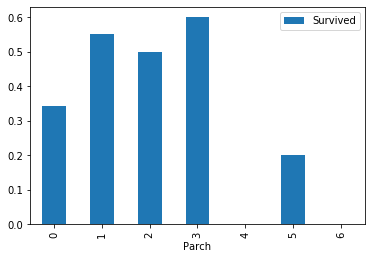

In [27]:
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar()

# 结论：
PClass Age Sex Embarked特征良好，可以尝试直接使用
SilSp特征不够显著，但是有一定的相关性，可以考虑提取其他数据。例如相加得到船上所有的亲属数量。

PassengerID Name Ticket Fare Cabin都不够显著，除非从中提取一些特殊信息，比如名字中的一些尊称来进行符合常理的推断。可以暂且不用这些特征。

另外，特征和特征之间可以相互补全。

*在数据的Name项中包含了对该乘客的称呼，如Mr、Miss等，这些信息包含了乘客的年龄、性别、也有可能包含社会地位，如Dr、Lady、Major、Master等称呼。这一项不方便用图表展示，但是在特征工程中，我们会将其提取出来,然后放到模型中。

*剩余因素还有船票价格、船舱号和船票号，这三个因素都可能会影响乘客在船中的位置从而影响逃生顺序，但是因为这三个因素与生存之间看不出明显规律，所以在后期模型融合时，将这些因素交给模型来决定其重要性。

# 特征工程

In [28]:
test_data

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [29]:
train_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [32]:
test_data['Survived'] = 0


In [33]:
test_data

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male  34.5      0      0              330911    7.8292   NaN        Q   
1    female  47.0      1      0              363272    7.0000   NaN        S   
2      male  62.0      0      0              240276    9.6875   NaN        Q   
3      male  27.0      0      0              315154    8.6625   NaN        S   
4    female  22.0      1      1             3101298   12.2875   NaN        S   
..      ...   ...    ...    ...                 ...       ...   ...      ...   
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S   
414  female  39.0      0      0            PC 17758  108.9000  C105        C   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S   
416    male   NaN      0      0              359309    8.0500   NaN        S   
417    male   NaN      1      1                2668   22.3583   NaN        C   

     survived  Survived  
0           0         0  
1           0         0  
2           0         0  
3           0         0  
4           0         0  
..        ...       ...  
413         0         0  
414         0         0  
415         0         0  
416         0         0  
417         0         0  

[418 rows x 13 columns]

In [36]:
test_data.drop(columns=['survived'])

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male  34.5      0      0              330911    7.8292   NaN        Q   
1    female  47.0      1      0              363272    7.0000   NaN        S   
2      male  62.0      0      0              240276    9.6875   NaN        Q   
3      male  27.0      0      0              315154    8.6625   NaN        S   
4    female  22.0      1      1             3101298   12.2875   NaN        S   
..      ...   ...    ...    ...                 ...       ...   ...      ...   
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S   
414  female  39.0      0      0            PC 17758  108.9000  C105        C   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S   
416    male   NaN      0      0              359309    8.0500   NaN        S   
417    male   NaN      1      1                2668   22.3583   NaN        C   

     Survived  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
413         0  
414         0  
415         0  
416         0  
417         0  

[418 rows x 12 columns]

In [40]:
train_test = train_data.append(test_data)

In [41]:
train_test

Age Cabin Embarked      Fare  \
0    22.0   NaN        S    7.2500   
1    38.0   C85        C   71.2833   
2    26.0   NaN        S    7.9250   
3    35.0  C123        S   53.1000   
4    35.0   NaN        S    8.0500   
..    ...   ...      ...       ...   
413   NaN   NaN        S    8.0500   
414  39.0  C105        C  108.9000   
415  38.5   NaN        S    7.2500   
416   NaN   NaN        S    8.0500   
417   NaN   NaN        C   22.3583   

                                                  Name  Parch  PassengerId  \
0                              Braund, Mr. Owen Harris      0            1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                               Heikkinen, Miss. Laina      0            3   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                             Allen, Mr. William Henry      0            5   
..                                                 ...    ...          ...   
413                                 Spector, Mr. Woolf      0         1305   
414                       Oliva y Ocana, Dona. Fermina      0         1306   
415                       Saether, Mr. Simon Sivertsen      0         1307   
416                                Ware, Mr. Frederick      0         1308   
417                           Peter, Master. Michael J      1         1309   

     Pclass     Sex  SibSp  Survived              Ticket  survived  
0         3    male      1         0           A/5 21171       NaN  
1         1  female      1         1            PC 17599       NaN  
2         3  female      0         1    STON/O2. 3101282       NaN  
3         1  female      1         1              113803       NaN  
4         3    male      0         0              373450       NaN  
..      ...     ...    ...       ...                 ...       ...  
413       3    male      0         0           A.5. 3236       0.0  
414       1  female      0         0            PC 17758       0.0  
415       3    male      0         0  SOTON/O.Q. 3101262       0.0  
416       3    male      0         0              359309       0.0  
417       3    male      1         0                2668       0.0  

[1309 rows x 13 columns]

In [49]:
del train_test


In [50]:
train_data


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [57]:
test_data

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male  34.5      0      0              330911    7.8292   NaN        Q   
1    female  47.0      1      0              363272    7.0000   NaN        S   
2      male  62.0      0      0              240276    9.6875   NaN        Q   
3      male  27.0      0      0              315154    8.6625   NaN        S   
4    female  22.0      1      1             3101298   12.2875   NaN        S   
..      ...   ...    ...    ...                 ...       ...   ...      ...   
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S   
414  female  39.0      0      0            PC 17758  108.9000  C105        C   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S   
416    male   NaN      0      0              359309    8.0500   NaN        S   
417    male   NaN      1      1                2668   22.3583   NaN        C   

     Survived  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
413         0  
414         0  
415         0  
416         0  
417         0  

[418 rows x 12 columns]

In [56]:
test_data = test_data.drop(columns=['survived'])

In [58]:
train_test=train_data.append(test_data)

In [59]:
train_test

Age Cabin Embarked      Fare  \
0    22.0   NaN        S    7.2500   
1    38.0   C85        C   71.2833   
2    26.0   NaN        S    7.9250   
3    35.0  C123        S   53.1000   
4    35.0   NaN        S    8.0500   
..    ...   ...      ...       ...   
413   NaN   NaN        S    8.0500   
414  39.0  C105        C  108.9000   
415  38.5   NaN        S    7.2500   
416   NaN   NaN        S    8.0500   
417   NaN   NaN        C   22.3583   

                                                  Name  Parch  PassengerId  \
0                              Braund, Mr. Owen Harris      0            1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                               Heikkinen, Miss. Laina      0            3   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                             Allen, Mr. William Henry      0            5   
..                                                 ...    ...          ...   
413                                 Spector, Mr. Woolf      0         1305   
414                       Oliva y Ocana, Dona. Fermina      0         1306   
415                       Saether, Mr. Simon Sivertsen      0         1307   
416                                Ware, Mr. Frederick      0         1308   
417                           Peter, Master. Michael J      1         1309   

     Pclass     Sex  SibSp  Survived              Ticket  
0         3    male      1         0           A/5 21171  
1         1  female      1         1            PC 17599  
2         3  female      0         1    STON/O2. 3101282  
3         1  female      1         1              113803  
4         3    male      0         0              373450  
..      ...     ...    ...       ...                 ...  
413       3    male      0         0           A.5. 3236  
414       1  female      0         0            PC 17758  
415       3    male      0         0  SOTON/O.Q. 3101262  
416       3    male      0         0              359309  
417       3    male      1         0                2668  

[1309 rows x 12 columns]

In [60]:
train_test = pd.get_dummies(train_test,columns=['Pclass'])

In [63]:
train_test.head(5)

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   SibSp  Survived            Ticket  Pclass_1  Pclass_2  Pclass_3  \
0      1         0         A/5 21171         0         0         1   
1      1         1          PC 17599         1         0         0   
2      0         1  STON/O2. 3101282         0         0         1   
3      1         1            113803         1         0         0   
4      0         0            373450         0         0         1   

   Sex_female  Sex_male  
0           0         1  
1           1         0  
2           1         0  
3           1         0  
4           0         1

In [62]:
train_test = pd.get_dummies(train_test,columns=["Sex"])

In [64]:
#这是剑豪模型后回来添加的新特征,模型的分数最终有所提高了.
train_test['SibSp_Parch'] = train_test['SibSp'] + train_test['Parch']

数据有极少量(3个)缺失值,但是在分列的时候,缺失值的所有列可以均为0,所以可以考虑不填充.

另外,也可以考虑用测试集众数来填充.先找出众数,再采用df.fillna()方法

In [65]:
train_test = pd.get_dummies(train_test,columns=["Embarked"])

In [50]:
train_test['Name1'] = train_test['Name'].str.extract('.+,(.+)')[0].str.extract( '^(.+?)\.')[0].str.strip()

In [53]:
train_test.head(5)

Age Cabin     Fare                                               Name  \
0  22.0   NaN   7.2500                            Braund, Mr. Owen Harris   
1  38.0   C85  71.2833  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2  26.0   NaN   7.9250                             Heikkinen, Miss. Laina   
3  35.0  C123  53.1000       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4  35.0   NaN   8.0500                           Allen, Mr. William Henry   

   Parch  PassengerId  SibSp  Survived            Ticket  Pclass_1  Pclass_2  \
0      0            1      1         0         A/5 21171         0         0   
1      0            2      1         1          PC 17599         1         0   
2      0            3      0         1  STON/O2. 3101282         0         0   
3      0            4      1         1            113803         1         0   
4      0            5      0         0            373450         0         0   

   Pclass_3  Sex_female  Sex_male  SibSp_Parch  Embarked_C  Embarked_Q  \
0         1           0         1            1           0           0   
1         0           1         0            1           1           0   
2         1           1         0            0           0           0   
3         0           1         0            1           0           0   
4         1           0         1            0           0           0   

   Embarked_S Name1  
0           1    Mr  
1           0   Mrs  
2           1  Miss  
3           1   Mrs  
4           1    Mr

In [52]:
#将姓名分类处理()
train_test['Name1'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer' , inplace = True)
train_test['Name1'].replace(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty' , inplace = True)
train_test['Name1'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train_test['Name1'].replace(['Mlle', 'Miss'], 'Miss')
train_test['Name1'].replace(['Mr'], 'Mr' , inplace = True)
train_test['Name1'].replace(['Master'], 'Master' , inplace = True)

In [54]:
train_test = pd.get_dummies(train_test,columns=['Name1'])

In [56]:
#从姓名中提取出姓
train_test['Name2'] = train_test['Name'].apply(lambda x: x.split('.')[1])

#计算数量,然后合并数据集
Name2_sum = train_test['Name2'].value_counts().reset_index()
Name2_sum.columns=['Name2','Name2_sum']
train_test = pd.merge(train_test,Name2_sum,how='left',on='Name2')

#由于出现一次时该特征时无效特征,用one来代替出现一次的姓
train_test.loc[train_test['Name2_sum'] == 1 , 'Name2_new'] = 'one'
train_test.loc[train_test['Name2_sum'] > 1 , 'Name2_new'] = train_test['Name2']
del train_test['Name2']

#分列处理
train_test = pd.get_dummies(train_test,columns=['Name2_new'])

In [57]:
train_test.head(10)

Age Cabin     Fare                                               Name  \
0  22.0   NaN   7.2500                            Braund, Mr. Owen Harris   
1  38.0   C85  71.2833  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2  26.0   NaN   7.9250                             Heikkinen, Miss. Laina   
3  35.0  C123  53.1000       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4  35.0   NaN   8.0500                           Allen, Mr. William Henry   
5   NaN   NaN   8.4583                                   Moran, Mr. James   
6  54.0   E46  51.8625                            McCarthy, Mr. Timothy J   
7   2.0   NaN  21.0750                     Palsson, Master. Gosta Leonard   
8  27.0   NaN  11.1333  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9  14.0   NaN  30.0708                Nasser, Mrs. Nicholas (Adele Achem)   

   Parch  PassengerId  SibSp  Survived            Ticket  Pclass_1  ...  \
0      0            1      1         0         A/5 21171         0  ...   
1      0            2      1         1          PC 17599         1  ...   
2      0            3      0         1  STON/O2. 3101282         0  ...   
3      0            4      1         1            113803         1  ...   
4      0            5      0         0            373450         0  ...   
5      0            6      0         0            330877         0  ...   
6      0            7      0         0             17463         1  ...   
7      1            8      3         0            349909         0  ...   
8      2            9      0         1            347742         0  ...   
9      0           10      1         1            237736         0  ...   

   Name2_new_ Thomas Henry  Name2_new_ Victor  Name2_new_ Washington  \
0                        0                  0                      0   
1                        0                  0                      0   
2                        0                  0                      0   
3                        0                  0                      0   
4                        0                  0                      0   
5                        0                  0                      0   
6                        0                  0                      0   
7                        0                  0                      0   
8                        0                  0                      0   
9                        0                  0                      0   

   Name2_new_ William  Name2_new_ William Edward  Name2_new_ William Henry  \
0                   0                          0                         0   
1                   0                          0                         0   
2                   0                          0                         0   
3                   0                          0                         0   
4                   0                          0                         1   
5                   0                          0                         0   
6                   0                          0                         0   
7                   0                          0                         0   
8                   0                          0                         0   
9                   0                          0                         0   

   Name2_new_ William James  Name2_new_ William John  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   
5                         0                        0   
6                         0                        0   
7                         0                        0   
8                         0                        0   
9                         0                        0   

   Name2_new_ William Thomas  Name2_new_one  
0              

In [58]:
#从上面的分析,发现该特征train集无miss值,test有一个缺失值,先查看
train_test.loc[train_test["Fare"].isnull()]

Age Cabin  Fare                Name  Parch  PassengerId  SibSp  \
1043  60.5   NaN   NaN  Storey, Mr. Thomas      0         1044      0   

      Survived Ticket  Pclass_1  ...  Name2_new_ Thomas Henry  \
1043         0   3701         0  ...                        0   

      Name2_new_ Victor  Name2_new_ Washington  Name2_new_ William  \
1043                  0                      0                   0   

      Name2_new_ William Edward  Name2_new_ William Henry  \
1043                          0                         0   

      Name2_new_ William James  Name2_new_ William John  \
1043                         0                        0   

      Name2_new_ William Thomas  Name2_new_one  
1043                          0              0  

[1 rows x 117 columns]

In [63]:
#票价与pclass和Embarked有关,所以用train分组后的平均数填充
train_data.groupby(by=["Pclass","Embarked"]).Fare.mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [64]:
#用pclass=3和Embarked=S的平均数14.644083来填充
train_test["Fare"].fillna(14.435422,inplace=True)

In [71]:
train_data[['Fare']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Fare    891 non-null float64
dtypes: float64(1)
memory usage: 7.1 KB


In [72]:
train_test['Ticket']

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 1309, dtype: object

In [76]:
#将Ticket提取字符列
#str.isnumeric()  如果S中只有数字字符，则返回True，否则返回False
train_test['Ticket_Letter'] = train_test['Ticket'].str.split().str[0]
train_test['Ticket_Letter'] = train_test['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)

In [77]:
train_test['Ticket_Letter']

0              A/5
1               PC
2         STON/O2.
3              NaN
4              NaN
           ...    
1304          A.5.
1305            PC
1306    SOTON/O.Q.
1307           NaN
1308           NaN
Name: Ticket_Letter, Length: 1309, dtype: object

In [78]:
train_test.drop('Ticket',inplace=True,axis=1)

In [79]:
#分列,此时nan值可以不做处理
train_test = pd.get_dummies(train_test,columns=['Ticket_Letter'],drop_first=True)

In [80]:
"""这是模型就好后回来增加的新特征
考虑年龄缺失值可能影响死亡情况,数据表明,年龄缺失的死亡率为0.19."""
train_test.loc[train_test["Age"].isnull()]['Survived'].mean()

0.19771863117870722

In [81]:
# 所以用年龄是否缺失值来构造新特征
train_test.loc[train_test["Age"].isnull() ,"age_nan"] = 1
train_test.loc[train_test["Age"].notnull() ,"age_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['age_nan'])

In [82]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Columns: 167 entries, Age to age_nan_1.0
dtypes: float64(2), int64(6), object(2), uint8(157)
memory usage: 353.2+ KB


In [83]:
#创建没有['Age','Survived']的数据集
missing_age = train_test.drop(['Survived','Cabin'],axis=1)
#将Age完整的项作为训练集、将Age缺失的项作为测试集。
missing_age_train = missing_age[missing_age['Age'].notnull()]
missing_age_test = missing_age[missing_age['Age'].isnull()]

In [84]:
#构建训练集合预测集的X和Y值
missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
missing_age_Y_train = missing_age_train['Age']
missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

In [87]:
# 先将数据标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#用测试集训练并标准化
ss.fit(missing_age_X_train)
missing_age_X_train = ss.transform(missing_age_X_train)
missing_age_X_test = ss.transform(missing_age_X_test)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [ ]:
#使用贝叶斯预测年龄
from sklearn import linear_model
lin = linear_model.BayesianRidge()

In [ ]:
lin.fit(missing_age_X_train,missing_age_Y_train)

In [ ]:
#利用loc将预测值填入数据集
train_test.loc[(train_test['Age'].isnull()), 'Age'] = lin.predict(missing_age_X_test)

In [ ]:
#将年龄划分是个阶段10以下,10-18,18-30,30-50,50以上
train_test['Age'] = pd.cut(train_test['Age'], bins=[0,10,18,30,50,100],labels=[1,2,3,4,5])

train_test = pd.get_dummies(train_test,columns=['Age'])